In [26]:
import rasterio

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [6]:
ruta_de_imagen = r"C:\Users\JuanMa\Google Drive\Mis Videos en Youtube\Analisis Raster con Python\03 - Clasificación de imágenes satelitales con técnicas de Machine Learning\LC09_L2SP_008057_20230203_20230311_02_T1_MTL.tif"
with rasterio.open(ruta_de_imagen) as imagen:
    imagen_satelital = imagen.read()
    metadata = imagen.profile

In [16]:
scaler = StandardScaler()
imagen_satelital_plana = imagen_satelital.reshape((imagen_satelital.shape[0], -1)).T
imagen_satelital_escalada = scaler.fit_transform(imagen_satelital_plana)

In [19]:
kmean = KMeans(n_clusters = 3)
kmean

KMeans(n_clusters=3)

In [20]:
imagen_kmeans = kmean.fit_predict(imagen_satelital_escalada)

C:\Users\JuanMa\Anaconda3\envs\geo\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [21]:
imagen_kmeans = imagen_kmeans.reshape((metadata['height'], metadata['width']))

In [22]:
ruta_de_imagen_salida = r"C:\Users\JuanMa\Google Drive\Mis Videos en Youtube\Analisis Raster con Python\03 - Clasificación de imágenes satelitales con técnicas de Machine Learning\imagen_kmeans3.tif"

In [24]:
with rasterio.open(ruta_de_imagen_salida, 'w', **metadata) as imagen_satelital:
    imagen_satelital.write(imagen_kmeans.astype(rasterio.int32), 1)

In [27]:
colores = ['red', 'green', 'blue']
rampa_de_colores = mcolors.ListedColormap(colores)

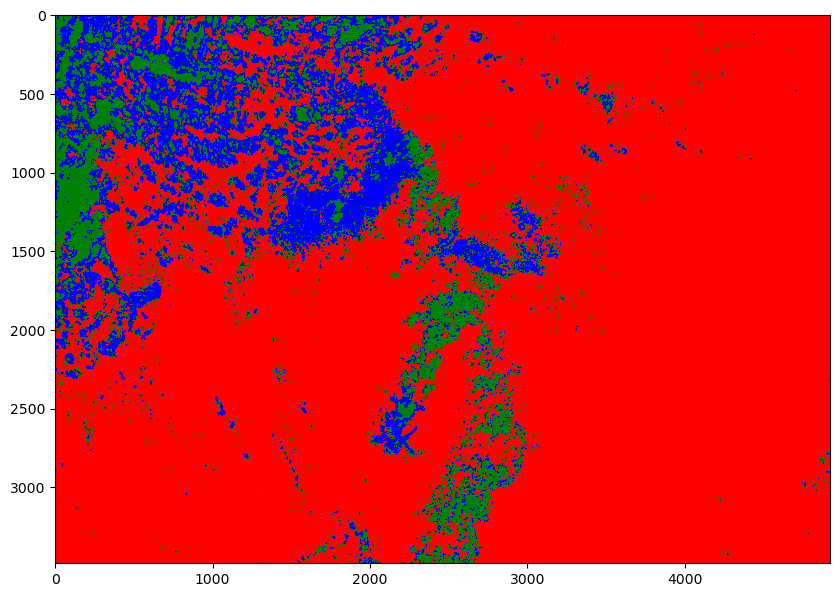

In [28]:
fig, ax = plt.subplots(figsize = (10, 10))
img = ax.imshow(imagen_kmeans, cmap = rampa_de_colores)
plt.show()

In [29]:
kmean = KMeans(n_clusters = 5)
kmean

KMeans(n_clusters=5)

In [30]:
imagen_kmeans = kmean.fit_predict(imagen_satelital_escalada)

C:\Users\JuanMa\Anaconda3\envs\geo\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


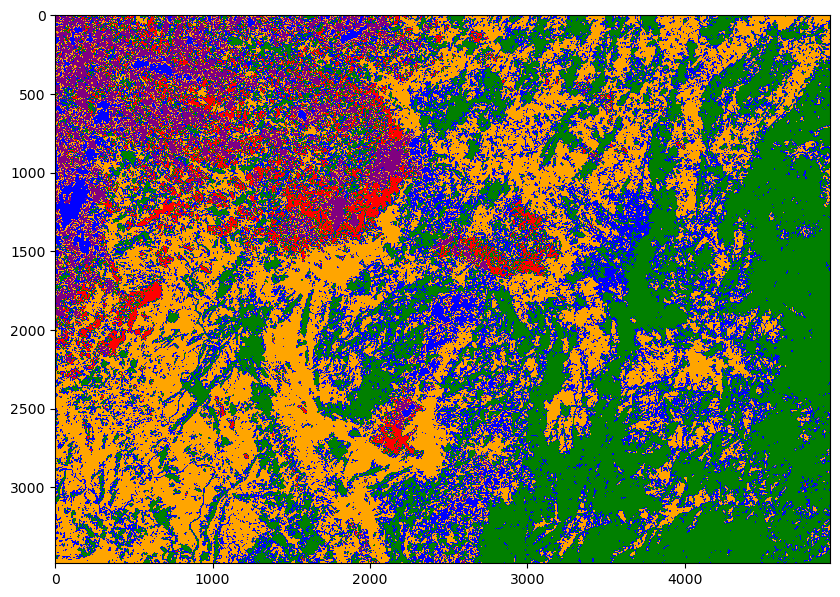

In [31]:
imagen_kmeans = imagen_kmeans.reshape((metadata['height'], metadata['width']))
ruta_de_imagen_salida = r"C:\Users\JuanMa\Google Drive\Mis Videos en Youtube\Analisis Raster con Python\03 - Clasificación de imágenes satelitales con técnicas de Machine Learning\imagen_kmeans5.tif"

with rasterio.open(ruta_de_imagen_salida, 'w', **metadata) as imagen_satelital:
    imagen_satelital.write(imagen_kmeans.astype(rasterio.int32), 1)
    
colores = ['red', 'green', 'blue', 'orange', 'purple']
rampa_de_colores = mcolors.ListedColormap(colores)

fig, ax = plt.subplots(figsize = (10, 10))
img = ax.imshow(imagen_kmeans, cmap = rampa_de_colores)
plt.show()